# Нелинейное уравнение теплопроводности

$$\frac{dT}{dt}=\frac{d}{dx}\left[k(T)\frac{dT}{dx}\right] + Q(T)$$
$T(t,x)$ - температура среды, $k(T)$ - нелинейный коэффициент теплопроводности, $Q(T)$ - нелинейная функция (например, моделирующая процессы горения, детонации).

$k(T) = k_0 T^{\alpha}, Q(T) = q_0 T^{\beta}, k_0, q_0, \alpha >0, \beta>1$

Будем использовать неявную схему
$$\frac{y^{n+1}_m-y^n_m}{\tau} = \frac{k_0}{h}\left(\frac{(y^n_{m+1})^\alpha + (y^n_{m})^\alpha}{2} \frac{y^{n+1}_{m+1}-y^{n+1}_m}{h} - \frac{(y^n_{m})^\alpha + (y^n_{m-1})^\alpha}{2} \frac{y^{n+1}_{m}-y^{n+1}_{m-1}}{h}\right)+q_0 (y^{n}_m)^\beta$$
$$m = 1,...L-1,n = 1,...N-1 $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

In [2]:
#Нам понадобится метод прогонки, который мы сейчас реализуем для трехдиагональной матрицы
def progonka(A,d):
    alpha = [0]
    beta = [0]
    n = len(d)
    x = [0]*n
    i = 0
    alpha.append(-A[i][i+1]/(alpha[i] + A[i][i]))
    beta.append((d[i] - beta[i])/(alpha[i] + A[i][i]))
    for i in range(1,n-1):
        alpha.append(-A[i][i+1]/(A[i][i-1]*alpha[i] + A[i][i]))
        beta.append((d[i] - A[i][i-1]*beta[i])/(A[i][i-1]*alpha[i] + A[i][i]))

    x[n-1] = (d[n-1] - A[n-1][n-2]*beta[n-1])/(A[n-1][n-1] + A[n-1][n-2]*alpha[n-1])

    for i in reversed(range(n-1)):
        x[i] = alpha[i+1]*x[i+1] + beta[i+1]

    return np.array(x)

Рассмотрим первый случай 
$$\beta = 1 + \alpha$$
Так называемый S-режим (полуширина профиля температуры постоянна)

In [197]:
#Рассмотрим первый случай 
k0 = 1.
q0 = 1.
beta = 3.
alpha = 2.

In [205]:
L = 7000
h = 1./L
x_l = np.linspace(-10,10,L+1)
N = 200
tau = 1./N
tn = np.linspace(0,1.,N+1)

In [6]:
import math

In [206]:
#Создадим массив с начальными условиями и нулевым приближением:
T1 = np.zeros([N+1,L+1])
for j in np.arange(0,L+1):
    if(math.fabs(x_l[j]) <= 2.7):
        T1[0][j] = (2.7-x_l[j])*(2.7+x_l[j])
    else:
        T1[0][j] = 0
    
for i in np.arange(1,N+1):
    T1[i][0] = 0
    T1[i][L] = 0

<IPython.core.display.Javascript object>


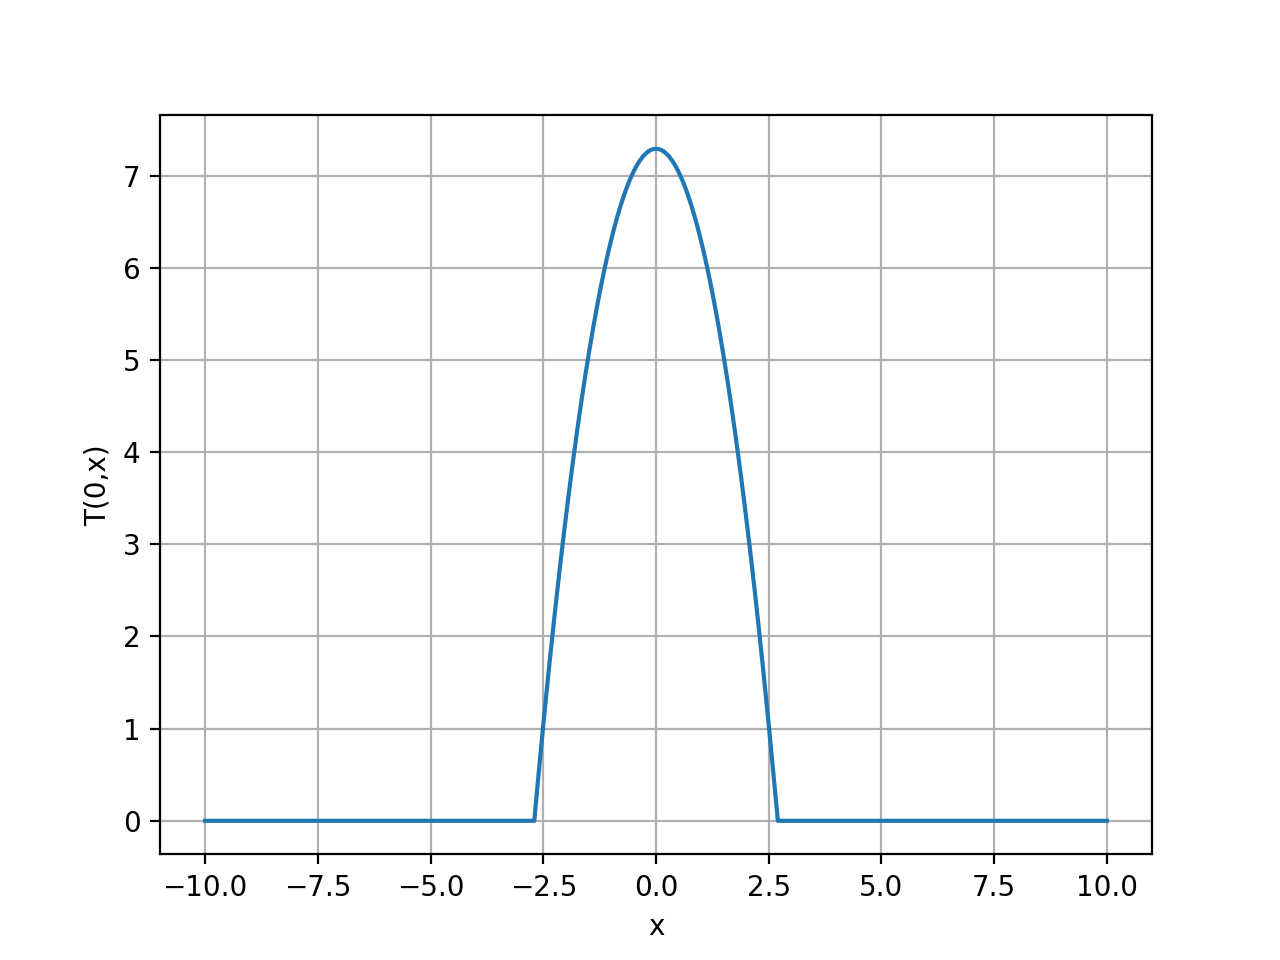

Text(0, 0.5, 'T(0,x)')

In [207]:
#Изобразим начальное условие в t=0
%matplotlib notebook
plt.plot(x_l, T1[0])
plt.grid()
plt.xlabel('x')
plt.ylabel('T(0,x)')

In [209]:
#Решать будем данные сеточные уравнения с помощью метода прогонки

for i in np.arange(1,N+1): #Тут для каждого момента времени мы задаем матрицу,состоящую из коэффициентов при u^n_m
    A = np.zeros([L-1,L-1])#в неявной схеме
    d = np.zeros(L-1)
    A[0][0] = 1./tau + ((T1[i-1][2])**alpha + 2*(T1[i-1][1])**alpha + (T1[i-1][0])**alpha)/2./h/h
    A[0][1] = -((T1[i-1][2])**alpha+T1[i-1][1]**alpha)/2./h/h
    d[0] = T1[i-1][1]/tau + T1[i][0]*((T1[i-1][1])**alpha + (T1[i-1][0])**alpha)/2./h/h + q0*(T1[i-1][1])**beta
    for j in np.arange(1,L-2):
        A[j][j-1] = -((T1[i-1][j+1])**alpha+T1[i-1][j]**alpha)/2./h/h
        A[j][j] = 1./tau + ((T1[i-1][j+2])**alpha + 2*(T1[i-1][j+1])**alpha + (T1[i-1][j])**alpha)/2./h/h
        A[j][j+1] = -((T1[i-1][j+2])**alpha+T1[i-1][j+1]**alpha)/2./h/h
        d[j] = T1[i-1][j+1]/tau + q0*(T1[i-1][j+1])**beta
    A[L-2][L-3] = -((T1[i-1][L-1])**alpha+T1[i-1][L-2]**alpha)/2./h/h
    A[L-2][L-2] = 1./tau + ((T1[i-1][L])**alpha + 2*(T1[i-1][L-1])**alpha + (T1[i-1][L-2])**alpha)/2./h/h
    d[L-2] = T1[i-1][L-1]/tau + T1[i][L]*((T1[i-1][L])**alpha + (T1[i-1][L-1])**alpha)/2./h/h + q0*(T1[i-1][L-1])**beta
    T1[:,1:-1][i] = progonka(A,d)
    

/home/smesh/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
/home/smesh/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


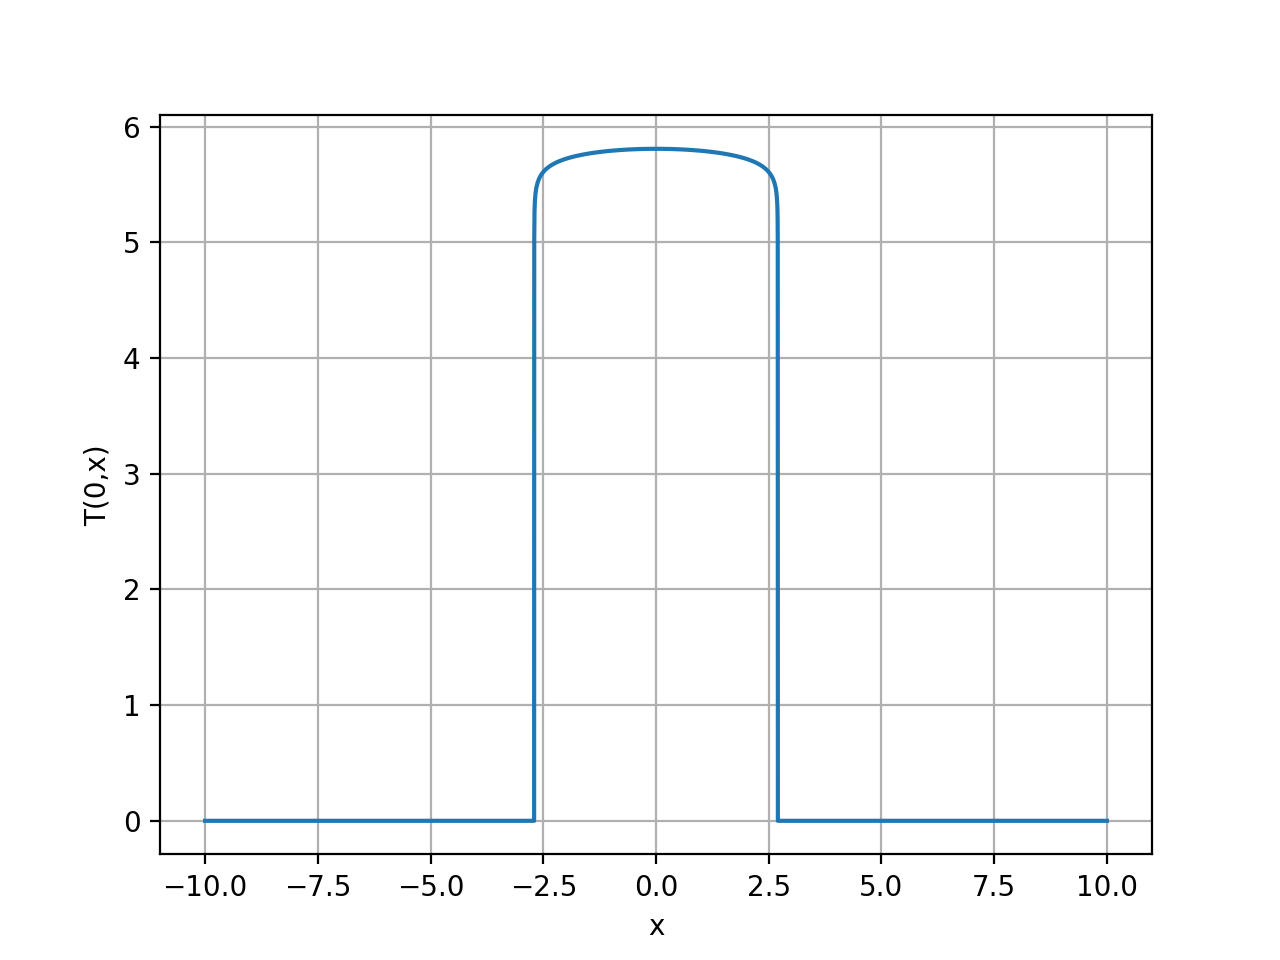

Text(0, 0.5, 'T(0,x)')

In [215]:
#Изобразим в последовательные моменты времени
%matplotlib notebook
plt.plot(x_l, T1[1])
plt.grid()
plt.xlabel('x')
plt.ylabel('T(0,x)')

<IPython.core.display.Javascript object>


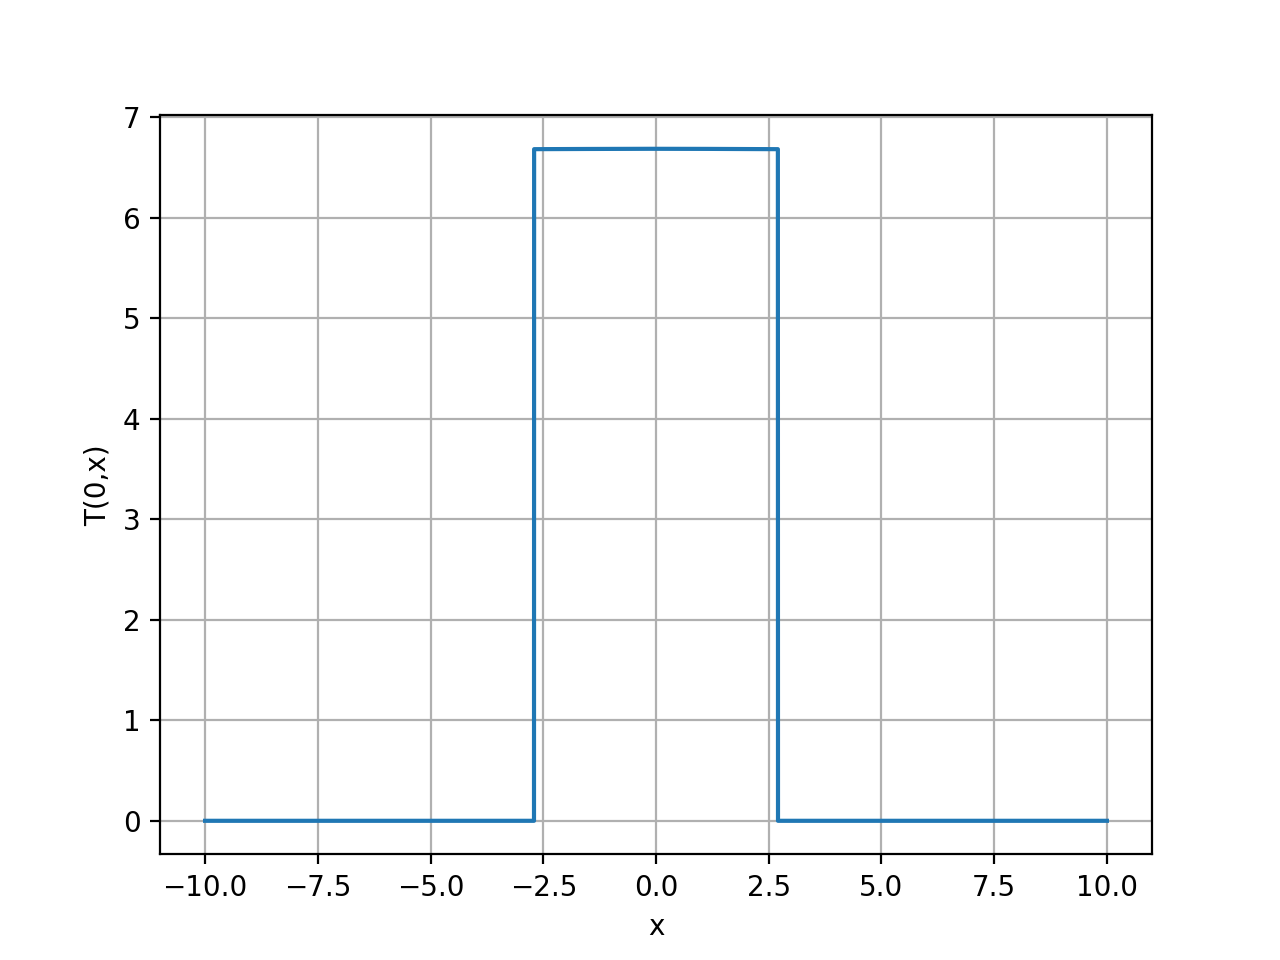

Text(0, 0.5, 'T(0,x)')

In [216]:
#Изобразим начальное условие в t=1.75
%matplotlib notebook
plt.plot(x_l, T1[2])
plt.grid()
plt.xlabel('x')
plt.ylabel('T(0,x)')

<IPython.core.display.Javascript object>


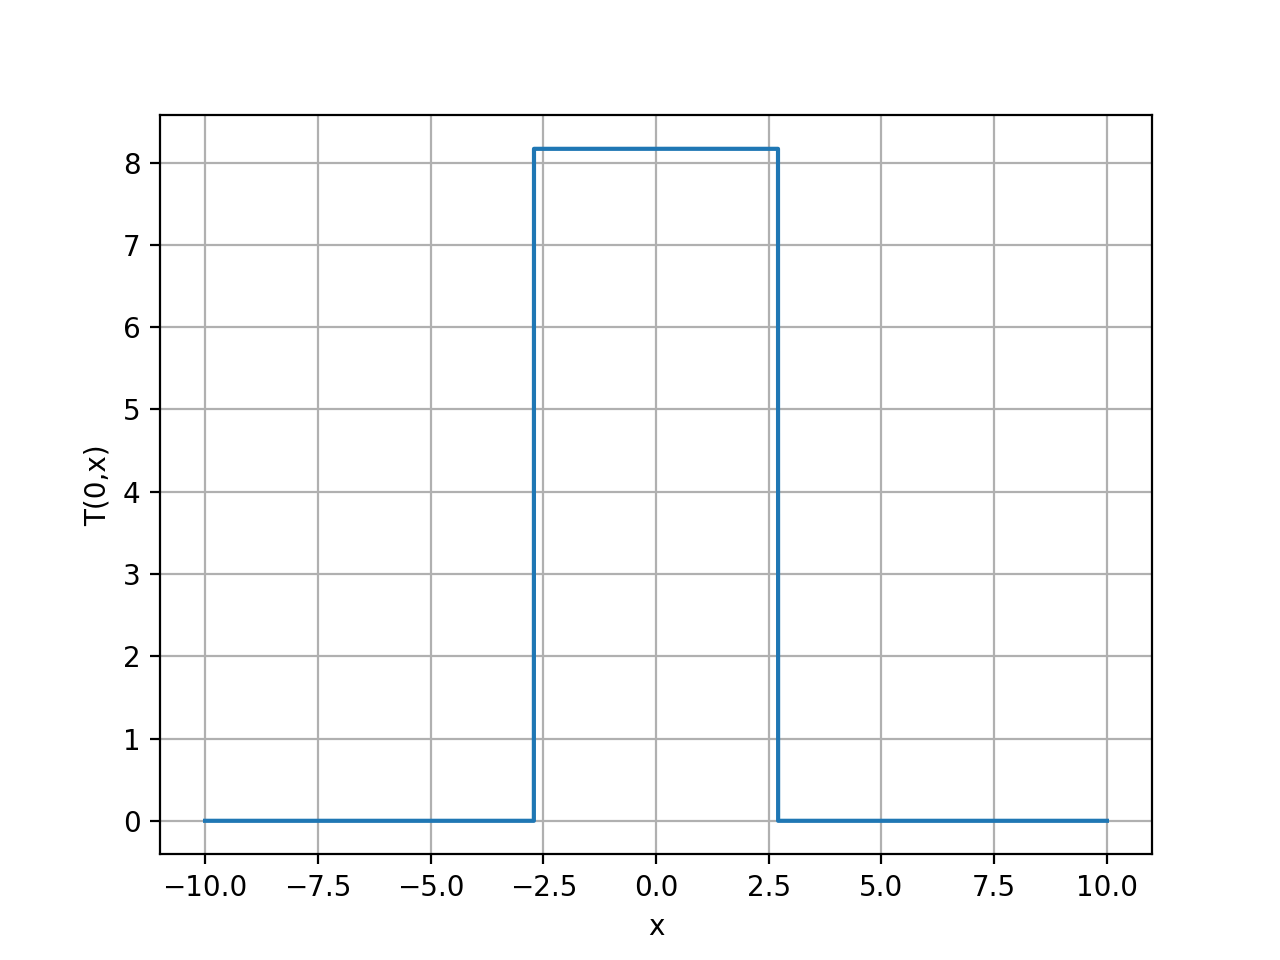

Text(0, 0.5, 'T(0,x)')

In [218]:
#Изобразим
%matplotlib notebook
plt.plot(x_l, T1[3])
plt.grid()
plt.xlabel('x')
plt.ylabel('T(0,x)')

<IPython.core.display.Javascript object>


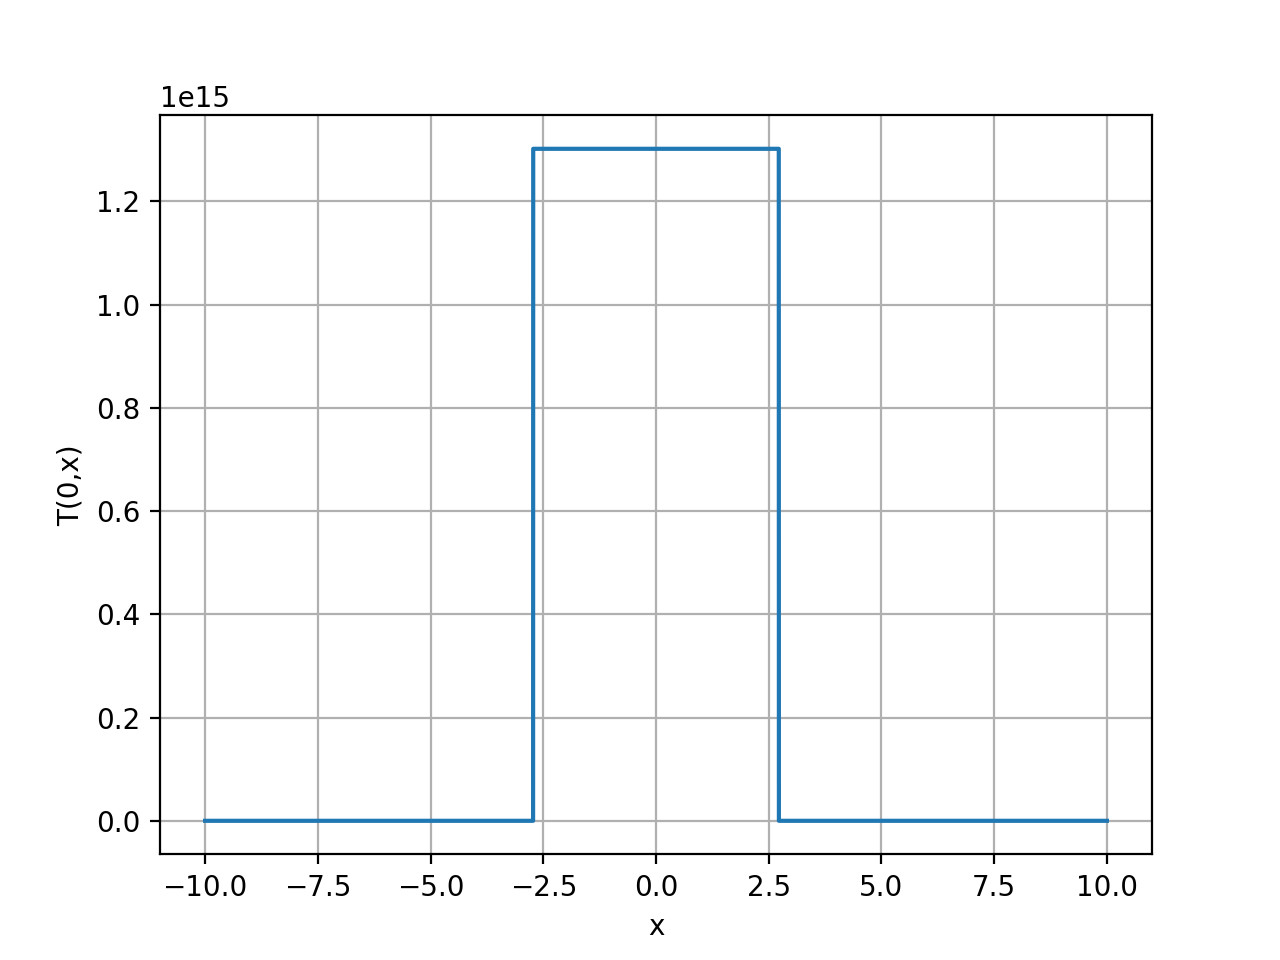

Text(0, 0.5, 'T(0,x)')

In [220]:
#Изобразим
%matplotlib notebook
plt.plot(x_l, T1[9])
plt.grid()
plt.xlabel('x')
plt.ylabel('T(0,x)')

наблюдается неограниченный рост на ширине $\frac{2\pi(\sigma+1)^{\frac{1}{2}}}{\sigma} = 5.44$

<IPython.core.display.Javascript object>


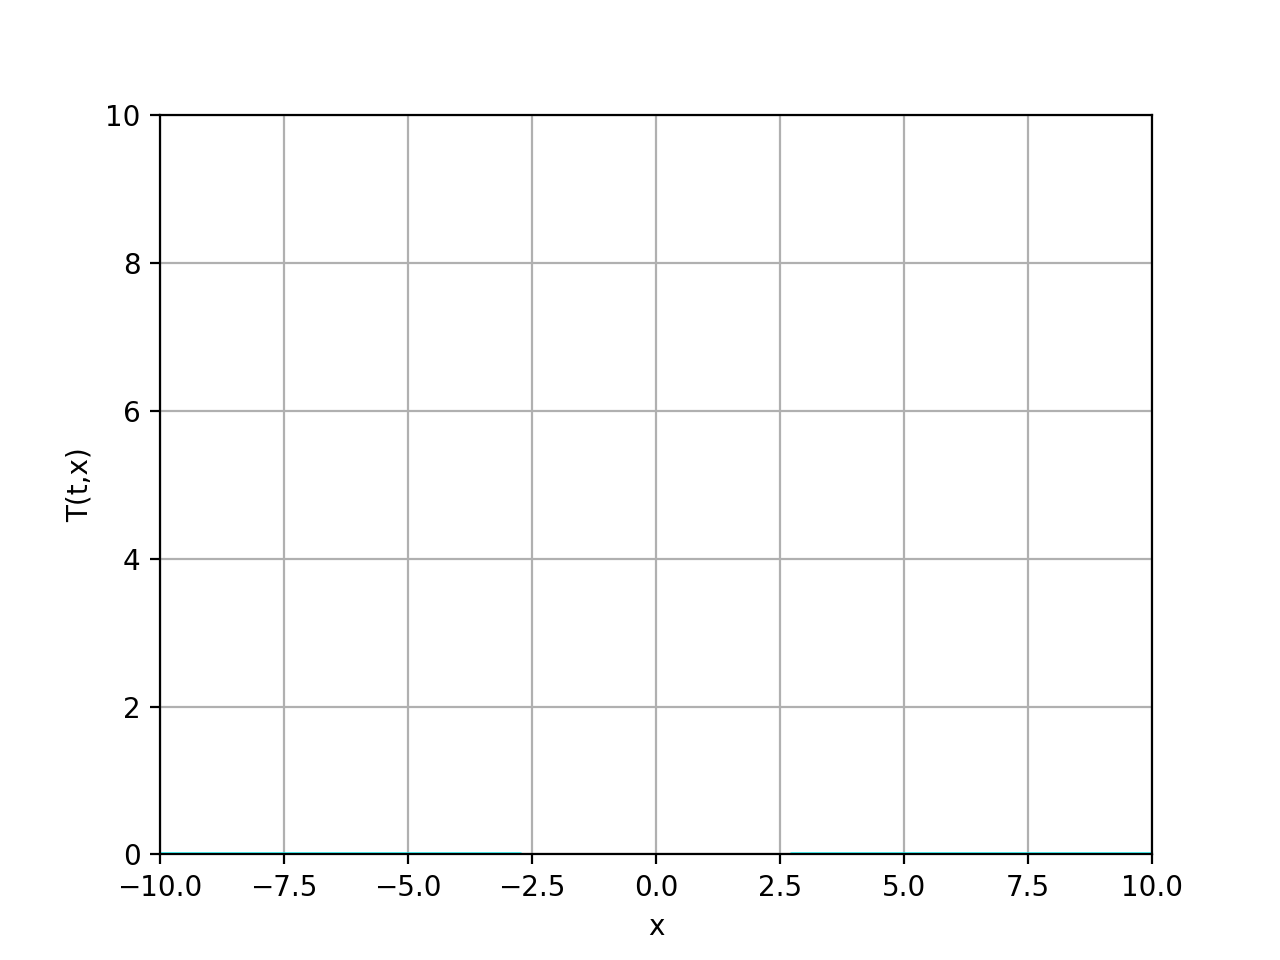

In [223]:
#Изобразим результаты в зависимости от времени в одном масштабе
%matplotlib notebook
%matplotlib notebook
#plt.style.use('dark_background')
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# animate the time data
k = 0
def animate(i):
    global k
    x = T1[k]
    k += 1
    ax1.clear()
    plt.plot(x_l,x,color='cyan')
    plt.grid(True)
    plt.ylim([0,10])
    plt.xlim([-10,10])
    plt.xlabel('x')
    plt.ylabel('T(t,x)')

anim = animation.FuncAnimation(fig,animate,frames=360,interval=20)
plt.show()

Профиль расширяется до ширины 5,44, и потом растет оставаясь на этой ширине, что соответствует теории

Перейдем ко второму случаю
$$\beta > 1 + \alpha$$
Так называемый  𝑳𝑺-режим с обострением,  полуширина профиля
сокращается, процесс локализуется, формируется так называемая диссипативная
структура.

In [260]:
#Рассмотрим второй случай 
k0 = 1.
q0 = 1.
beta = 3.5
alpha = 2.

In [261]:
L = 7000
h = 1./L
x_l = np.linspace(-10,10,L+1)
N = 3100
tau = 15.5/N
tn = np.linspace(0,14.5,N+1)


In [282]:
#Создадим массив с начальными условиями и нулевым приближением:
T = np.zeros([N+1,L+1])
for j in np.arange(0,L+1):
    if(math.fabs(x_l[j]) <= 1.):
        T[0][j] = (1.-x_l[j])*(1.+x_l[j])
    else:
        T[0][j] = 0
    
for i in np.arange(1,N+1):
    T3[i][0] = 0
    T3[i][L] = 0

Для того, чтобы увидеть диссипативную структуру, нам придется использовать более точный расчет на слоях

In [283]:
eps0 = 0.5
for i in np.arange(1,N+1):
    itera = T[i-1].copy()
    A = np.zeros([L-1,L-1])
    d = np.zeros(L-1)
    A[0][0] = 1./tau + ((itera[2])**alpha + 2*(itera[1])**alpha + (itera[0])**alpha)/2./h/h
    A[0][1] = -((itera[2])**alpha+(itera[1])**alpha)/2./h/h
    d[0] = T[i-1][1]/tau + T[i][0]*((itera[1])**alpha + (itera[0])**alpha)/2./h/h + (itera[1])**beta
    for j in np.arange(1,L-2):
        A[j][j-1] = -((itera[j+1])**alpha+itera[j]**alpha)/2./h/h
        A[j][j] = 1./tau + ((itera[j+2])**alpha + 2*(itera[j+1])**alpha + (itera[j])**alpha)/2./h/h
        A[j][j+1] = -((itera[j+2])**alpha+itera[j+1]**alpha)/2./h/h
        d[j] = T[i-1][j+1]/tau + (itera[j+1])**beta
    A[L-2][L-3] = -((itera[L-1])**alpha+itera[L-2]**alpha)/2./h/h
    A[L-2][L-2] = 1./tau + ((itera[L])**alpha + 2*(itera[L-1])**alpha + (itera[L-2])**alpha)/2./h/h
    d[L-2] = T[i-1][L-1]/tau + T[i][L]*((itera[L])**alpha + (itera[L-1])**alpha)/2./h/h + (itera[L-1])**beta
    u = progonka(A,d)
    eps = ((u-itera[1:-1])**2).sum()
    while(eps>eps0):
        itera[1:-1] = u 
        A = np.zeros([L-1,L-1])
        d = np.zeros(L-1)
        A[0][0] = 1./tau + ((itera[2])**alpha + 2*(itera[1])**alpha + (itera[0])**alpha)/2./h/h
        A[0][1] = -((itera[2])**alpha+(itera[1])**alpha)/2./h/h
        d[0] = T[i-1][1]/tau + T[i][0]*((itera[1])**alpha + (itera[0])**alpha)/2./h/h + q0*(itera[1])**beta
        for j in np.arange(1,L-2):
            A[j][j-1] = -((itera[j+1])**alpha+itera[j]**alpha)/2./h/h
            A[j][j] = 1./tau + ((itera[j+2])**alpha + 2*(itera[j+1])**alpha + (itera[j])**alpha)/2./h/h
            A[j][j+1] = -((itera[j+2])**alpha+itera[j+1]**alpha)/2./h/h
            d[j] = T[i-1][j+1]/tau + q0*(itera[j+1])**beta
        A[L-2][L-3] = -((itera[L-1])**alpha+itera[L-2]**alpha)/2./h/h
        A[L-2][L-2] = 1./tau + ((itera[L])**alpha + 2*(itera[L-1])**alpha + (itera[L-2])**alpha)/2./h/h
        d[L-2] = T[i-1][L-1]/tau + T[i][L]*((itera[L])**alpha + (itera[L-1])**alpha)/2./h/h + q0*(itera[L-1])**beta
        u = progonka(A,d)
        eps = ((u-itera[1:-1])**2).sum()
    
    T[:,1:-1][i] = u
    #print(i)                   

<IPython.core.display.Javascript object>


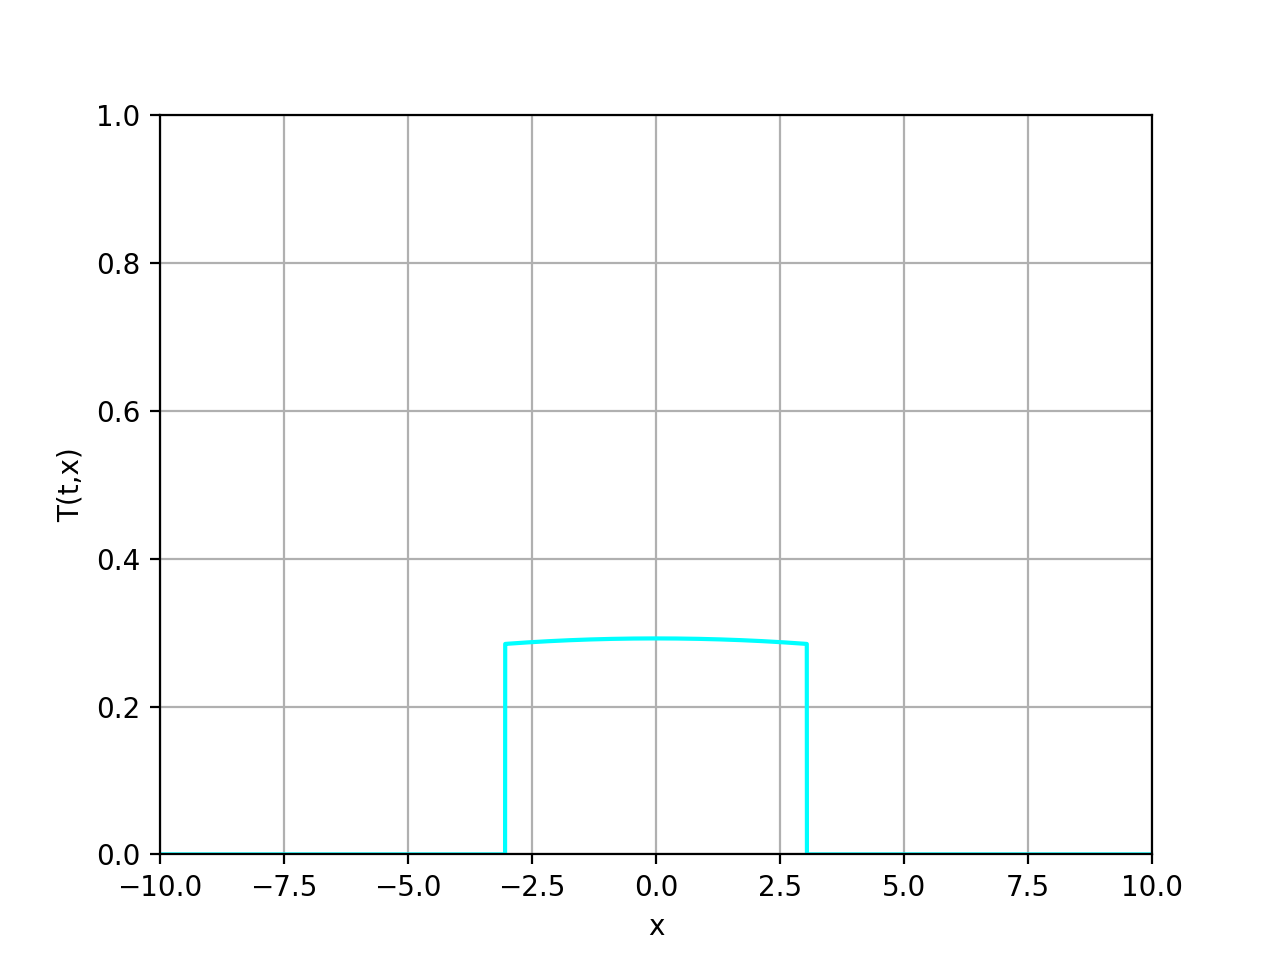

In [288]:
#Изобразим результаты в зависимости от времени в одном масштабе
%matplotlib notebook
%matplotlib notebook
#plt.style.use('dark_background')
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# animate the time data
k = 0
def animate(i):
    global k
    x = T[k]
    k += 1
    ax1.clear()
    plt.plot(x_l,x,color='cyan')
    plt.grid(True)
    plt.ylim([0,1])
    plt.xlim([-10,10])
    plt.xlabel('x')
    plt.ylabel('T(t,x)')

anim = animation.FuncAnimation(fig,animate,frames=360,interval=20)
plt.show()

<IPython.core.display.Javascript object>


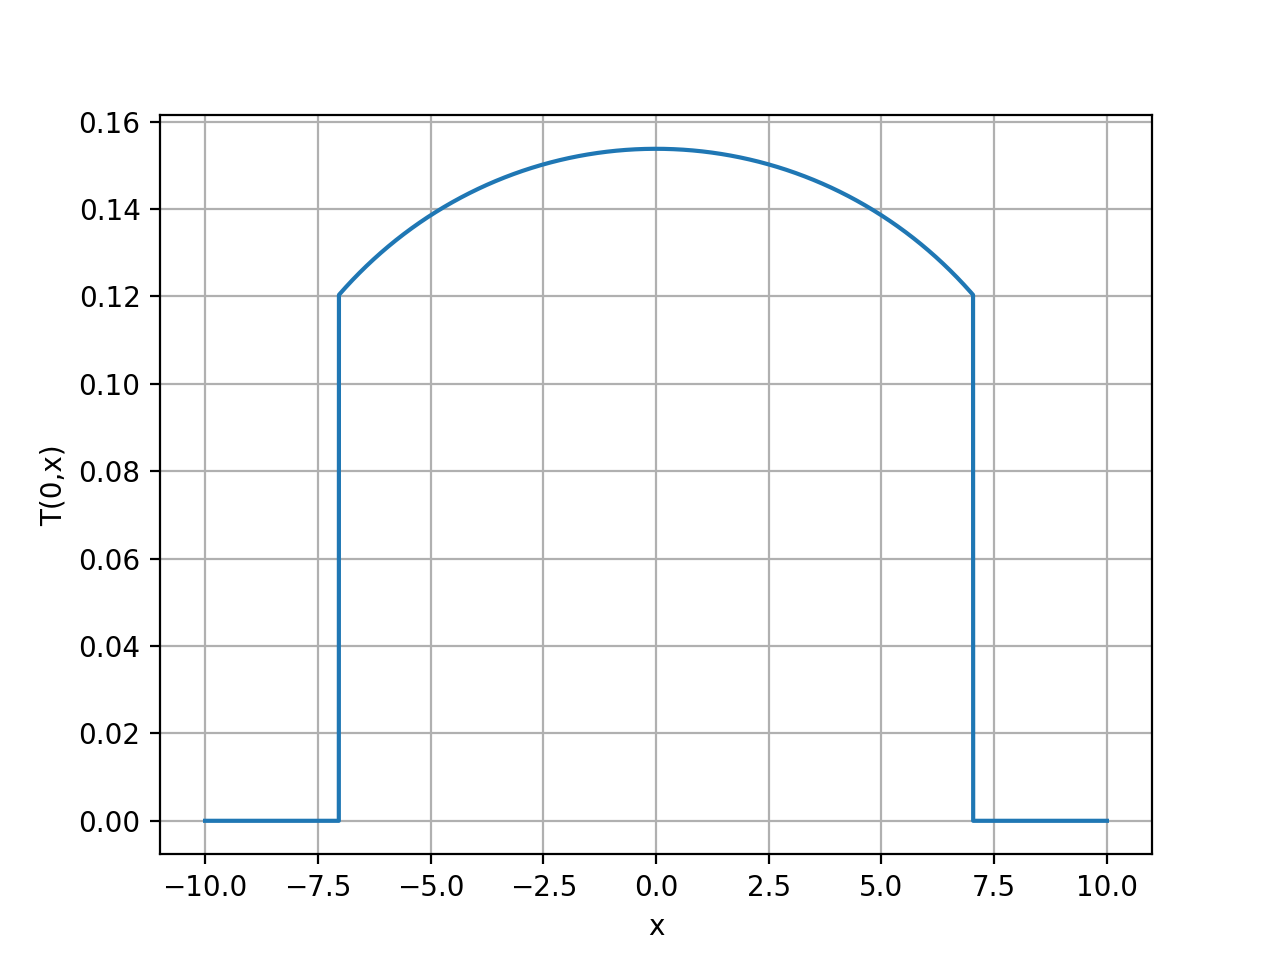

Text(0, 0.5, 'T(0,x)')

In [289]:
#Изобразим начальное условие в t=0
%matplotlib notebook
plt.plot(x_l, T[2000])
plt.grid()
plt.xlabel('x')
plt.ylabel('T(0,x)')

<IPython.core.display.Javascript object>


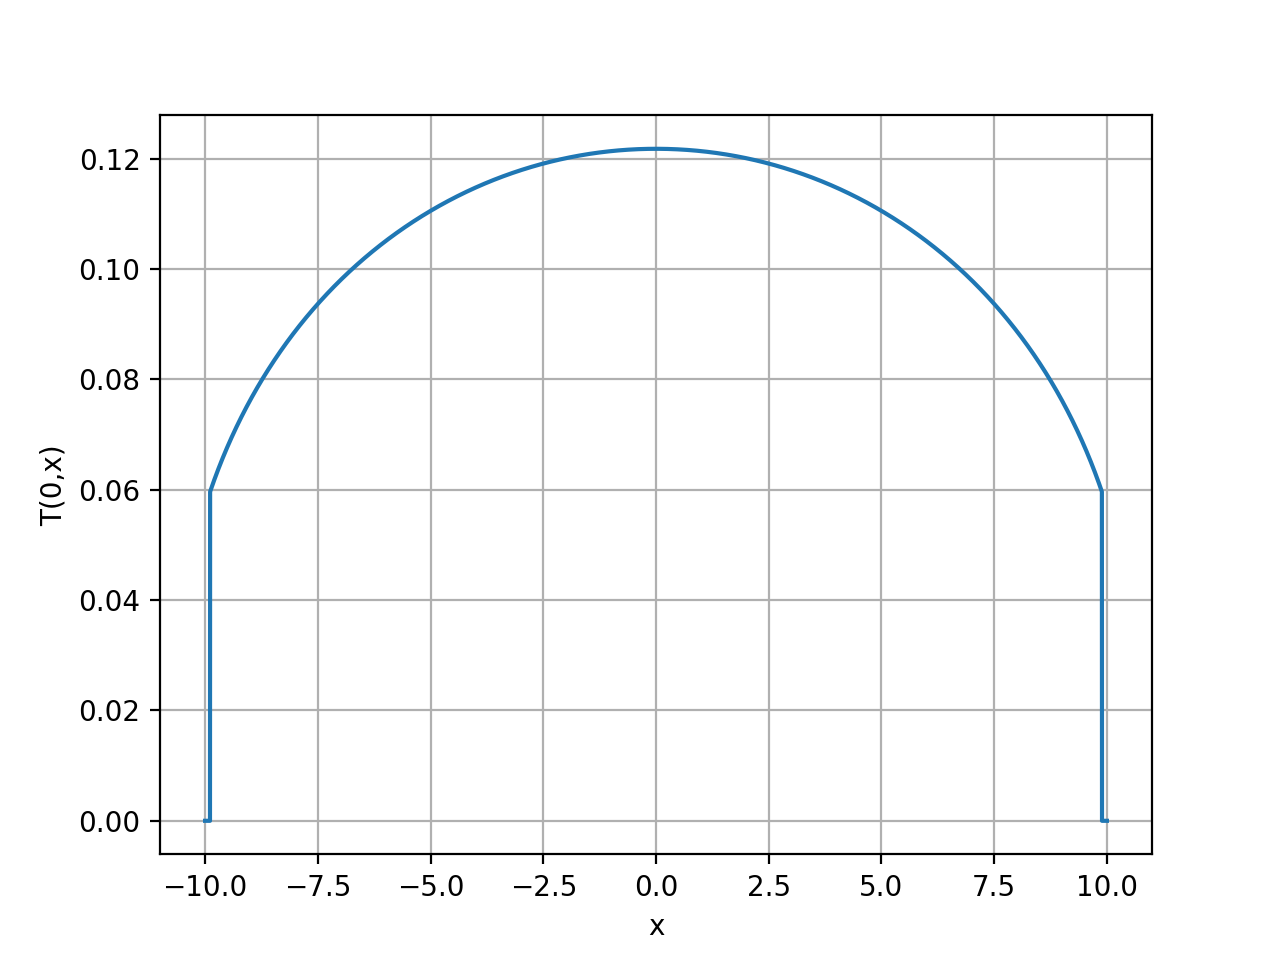

Text(0, 0.5, 'T(0,x)')

In [290]:
%matplotlib notebook
plt.plot(x_l, T[3000])
plt.grid()
plt.xlabel('x')
plt.ylabel('T(0,x)')

<IPython.core.display.Javascript object>


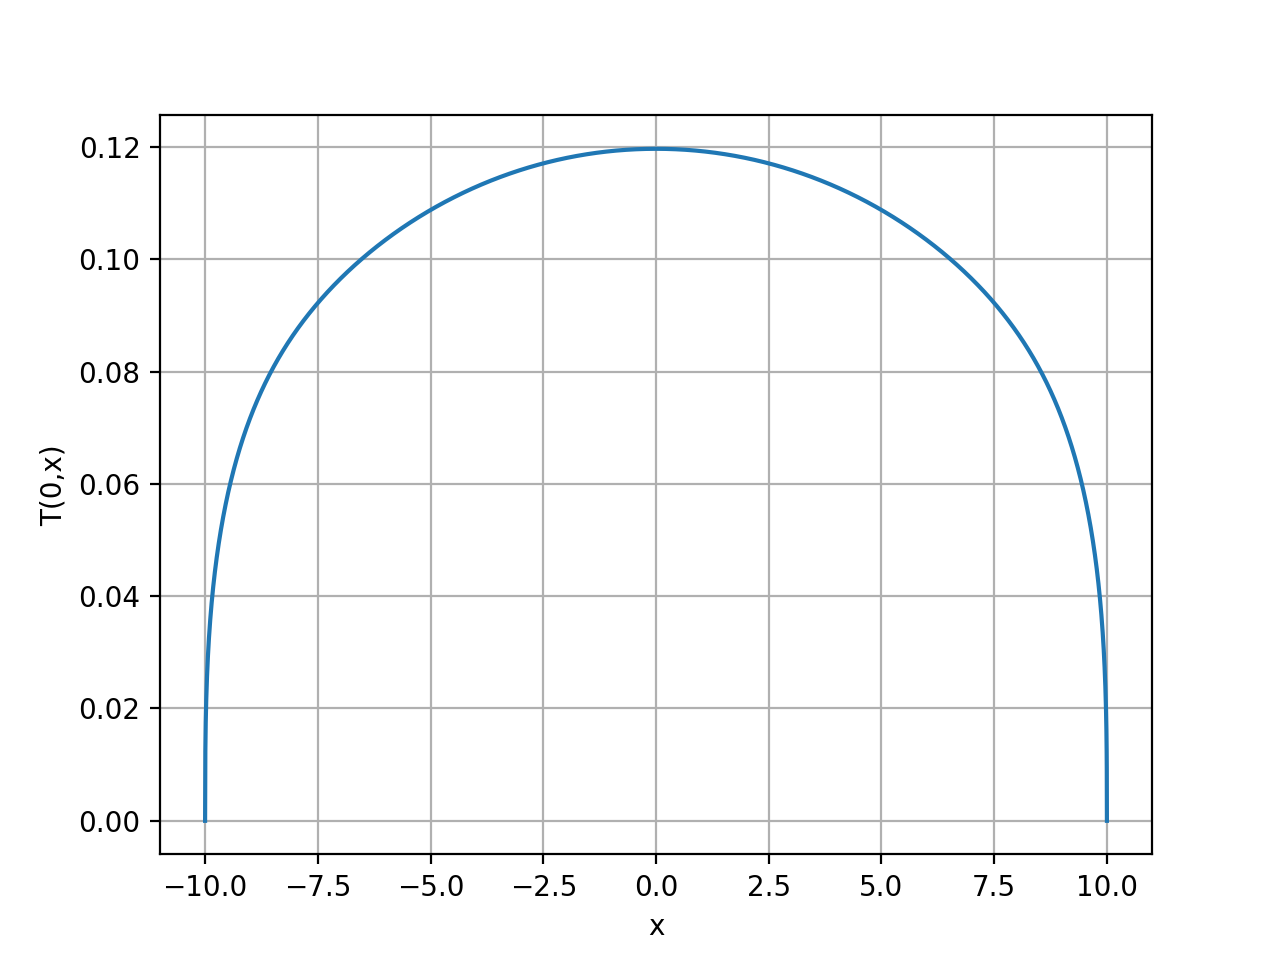

Text(0, 0.5, 'T(0,x)')

In [287]:
%matplotlib notebook
plt.plot(x_l, T[3100])
plt.grid()
plt.xlabel('x')
plt.ylabel('T(0,x)')

Видим, что профиль горения сужается

Перейдем к третьему случаю
$$\beta < 1 + \alpha$$
𝑯𝑺-режим с неограниченным ростом температуры, наблюдаются тепловые волны, амплитуда которых растет. 

In [165]:
#Рассмотрим третий случай 
k0 = 1.
q0 = 1.
beta = 1.667
alpha = 2.

In [166]:
L = 7000
h = 1./L
x_l = np.linspace(-10,10,L+1)
N = 900
tau = 4.5/N
tn = np.linspace(0,4.5,N+1)

In [167]:
#Создадим массив с начальными условиями и нулевым приближением:
T2 = np.zeros([N+1,L+1])
for j in np.arange(0,L+1):
    if(math.fabs(x_l[j]) <= 1.):
        T2[0][j] = (1.-x_l[j])*(1.+x_l[j])
    else:
        T2[0][j] = 0
    
for i in np.arange(1,N+1):
    T2[i][0] = 0
    T2[i][L] = 0

In [168]:
#Решать будем данные сеточные уравнения с помощью метода прогонки.

for i in np.arange(1,N+1): #Тут для каждого момента времени мы задаем матрицу,состоящую из коэффициентов при u^n_m
    A = np.zeros([L-1,L-1])#в неявной схеме
    d = np.zeros(L-1)
    A[0][0] = 1./tau + ((T2[i-1][2])**alpha + 2*(T2[i-1][1])**alpha + (T2[i-1][0])**alpha)/2./h/h
    A[0][1] = -((T2[i-1][2])**alpha+(T2[i-1][1])**alpha)/2./h/h
    d[0] = T2[i-1][1]/tau + T2[i][0]*((T2[i-1][1])**alpha + (T2[i-1][0])**alpha)/2./h/h + (T2[i-1][1])**beta
    for j in np.arange(1,L-2):
        A[j][j-1] = -((T2[i-1][j+1])**alpha+T2[i-1][j]**alpha)/2./h/h
        A[j][j] = 1./tau + ((T2[i-1][j+2])**alpha + 2*(T2[i-1][j+1])**alpha + (T2[i-1][j])**alpha)/2./h/h
        A[j][j+1] = -((T2[i-1][j+2])**alpha+T2[i-1][j+1]**alpha)/2./h/h
        d[j] = T2[i-1][j+1]/tau + (T2[i-1][j+1])**beta
    A[L-2][L-3] = -((T2[i-1][L-1])**alpha+T2[i-1][L-2]**alpha)/2./h/h
    A[L-2][L-2] = 1./tau + ((T2[i-1][L])**alpha + 2*(T2[i-1][L-1])**alpha + (T2[i-1][L-2])**alpha)/2./h/h
    d[L-2] = T2[i-1][L-1]/tau + T2[i][L]*((T2[i-1][L])**alpha + (T2[i-1][L-1])**alpha)/2./h/h + (T2[i-1][L-1])**beta
    T2[:,1:-1][i] = progonka(A,d)

/home/smesh/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


<IPython.core.display.Javascript object>


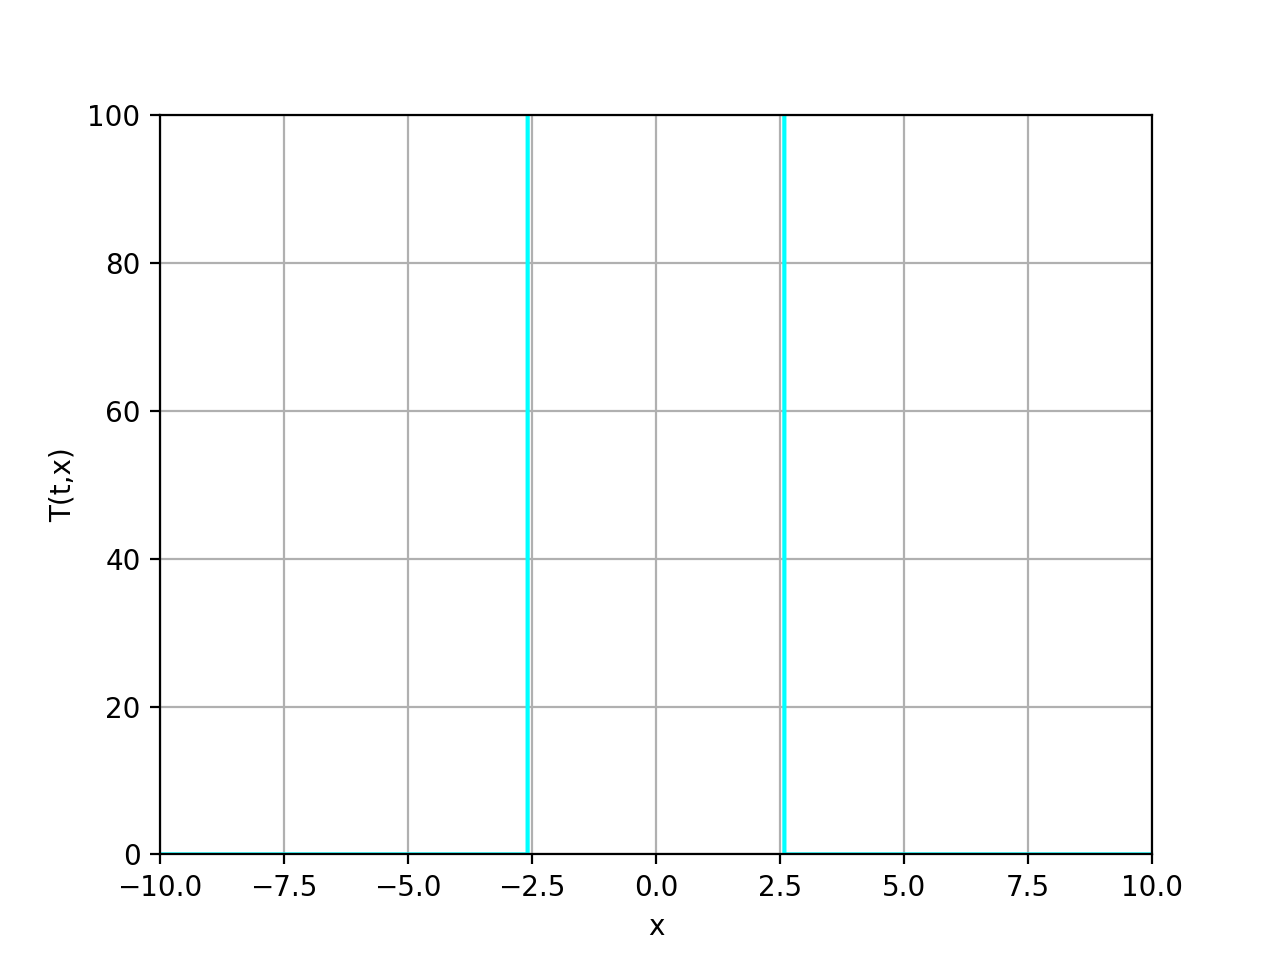

In [171]:
#Изобразим результаты в зависимости от времени в одном масштабе
%matplotlib notebook
%matplotlib notebook
#plt.style.use('dark_background')
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# animate the time data
k = 0
def animate(i):
    global k
    x = T2[k]
    k += 1
    ax1.clear()
    plt.plot(x_l,x,color='cyan')
    plt.grid(True)
    plt.ylim([0,100])
    plt.xlim([-10,10])
    plt.xlabel('x')
    plt.ylabel('T(t,x)')

anim = animation.FuncAnimation(fig,animate,frames=360,interval=20)
plt.show()

<IPython.core.display.Javascript object>


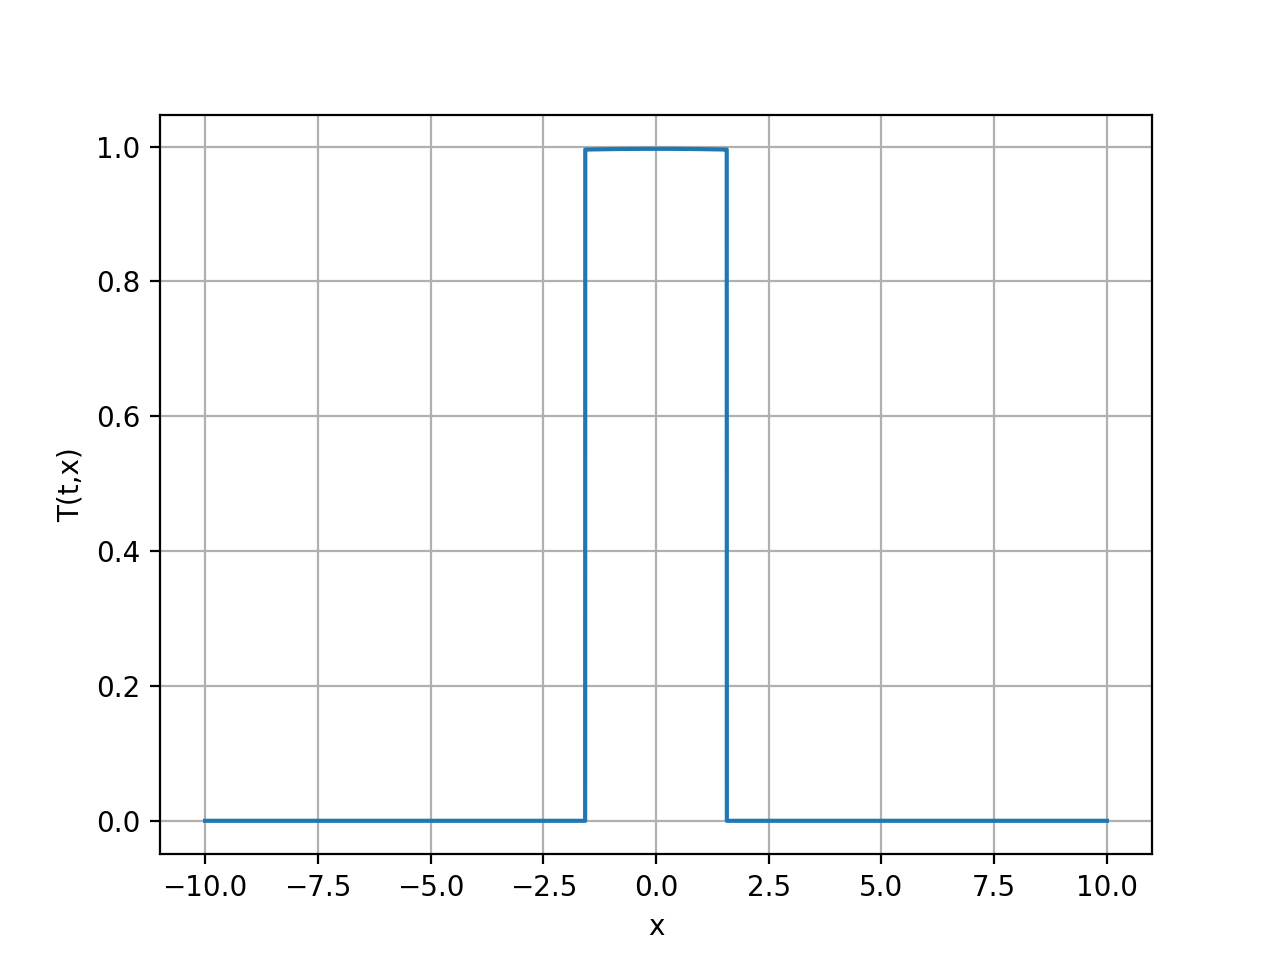

Text(0, 0.5, 'T(t,x)')

In [194]:
#Изобразим в t=1
%matplotlib notebook
plt.plot(x_l, T2[200])
plt.grid()
plt.xlabel('x')
plt.ylabel('T(t,x)')

<IPython.core.display.Javascript object>


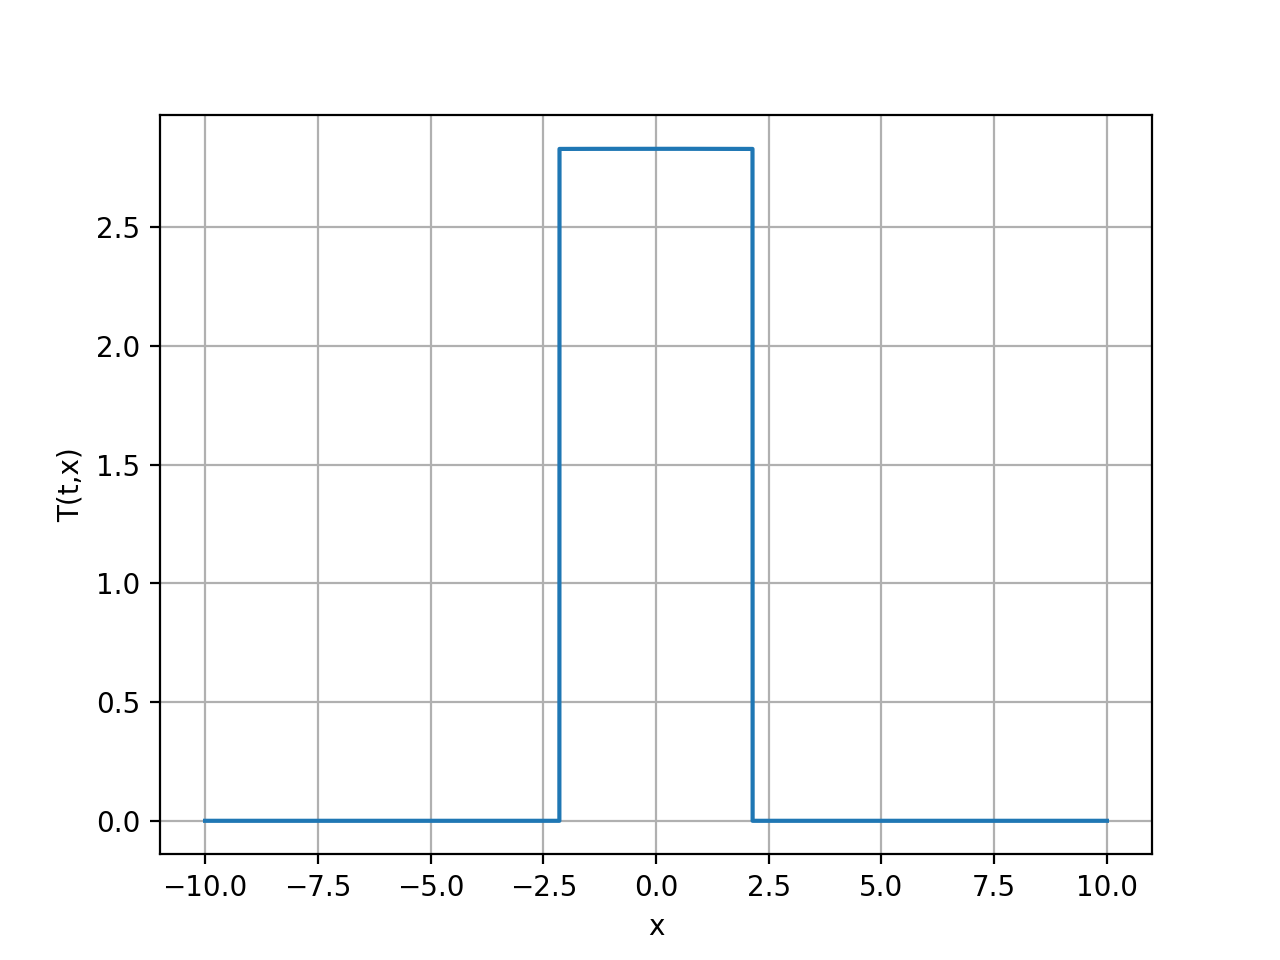

Text(0, 0.5, 'T(t,x)')

In [195]:
#Изобразим в t=2
%matplotlib notebook
plt.plot(x_l, T2[400])
plt.grid()
plt.xlabel('x')
plt.ylabel('T(t,x)')

<IPython.core.display.Javascript object>


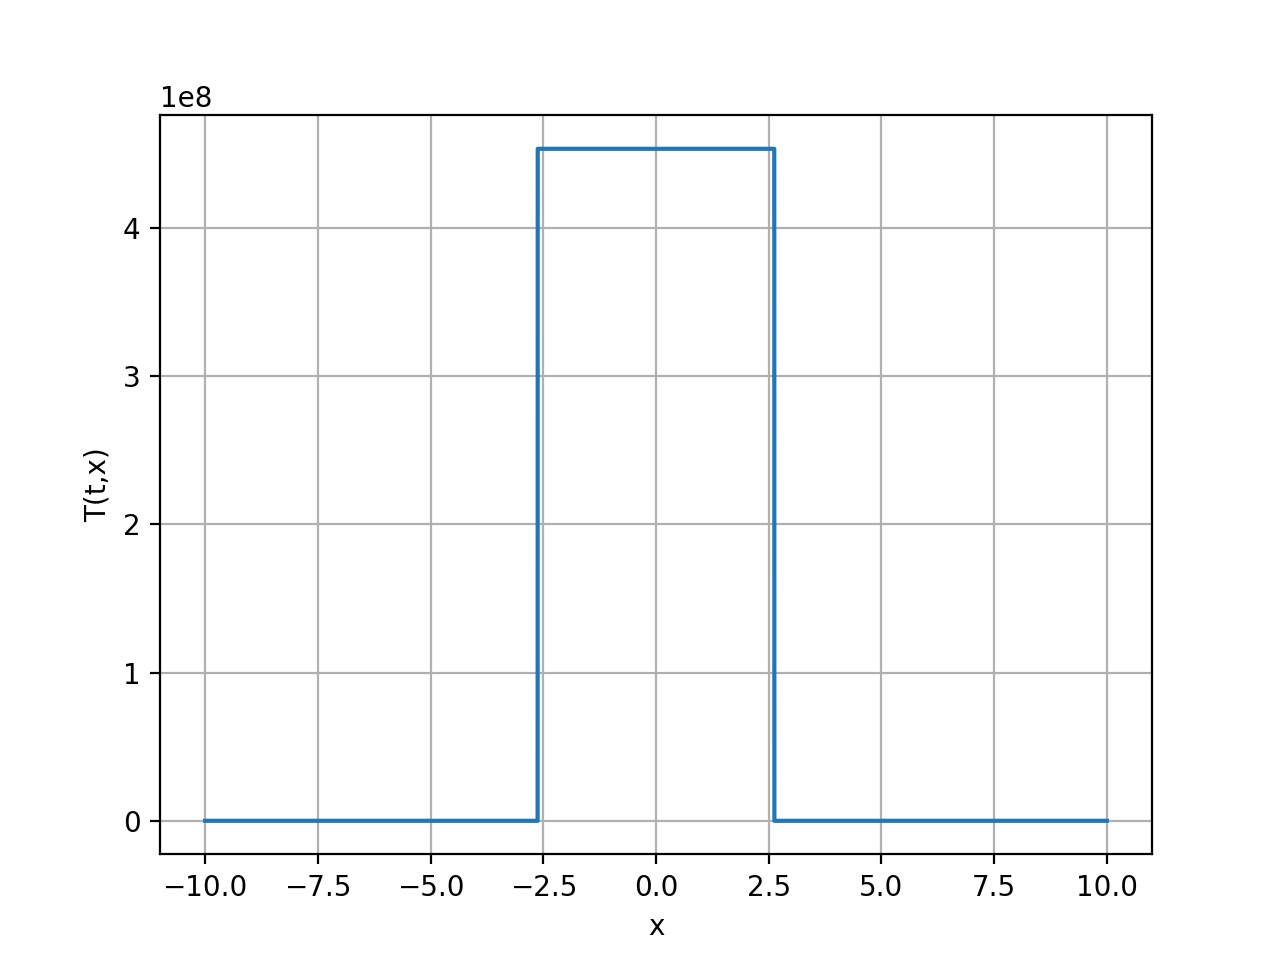

Text(0, 0.5, 'T(t,x)')

In [196]:
#Изобразим начальное условие в t=3
%matplotlib notebook
plt.plot(x_l, T2[569])
plt.grid()
plt.xlabel('x')
plt.ylabel('T(t,x)')

Наблюдаем неограниченный рост температуры на протяжении всего процесса - как и в теории